# Prerequisite

In [1]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
!pip install scikit-learn-intelex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.8/131.8 kB 928.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 MB 6.3 MB/s eta 0:00:00


In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data importing

In [5]:
!unzip /content/drive/MyDrive/Colab-Notebooks/txsa/Final-final-data.zip -d /content/

Archive:  /content/drive/MyDrive/Colab-Notebooks/txsa/Final-final-data.zip
  inflating: /content/cleaned_Suicide_Detection_with_Token.csv  
  inflating: /content/cleaned_Suicide_Detection_without_Token.csv  


In [6]:
# df_cln = pd.read_csv('/content/cleaned_SuicideAndDepression_detection_with_Token.csv')
df_cln = pd.read_csv('/content/cleaned_Suicide_Detection_without_Token.csv')
len(df_cln)

230347

# Logistic regression

## Modeling

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    df_cln['text'], df_cln['class'], test_size=0.2, random_state=42)

# Create a TfidfVectorizer instance
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = vectorizer.fit_transform(X_train)

# Transform the test data
X_test = vectorizer.transform(X_test)

# Train a logistic regression classifier
classifier = LogisticRegression() # Setup model
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

## Classification Report

In [ ]:
# result & discussion
# training loss (dpends overfitting issues) | accuracy
train_accuracy = classifier.score(X_train,y_train)
print(f"Train Accuracy: {train_accuracy}")
print(f"Train Loss: {1-train_accuracy}")

# testing result in %
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy) # test accuracy

# classification reports
print(classification_report(y_test,y_pred))

Train Accuracy: 0.8938608724908698
Train Loss: 0.10613912750913024
Testing Accuracy: 0.8935315823746472
              precision    recall  f1-score   support

 non-suicide       0.87      0.92      0.90     23024
     suicide       0.92      0.86      0.89     23046

    accuracy                           0.89     46070
   macro avg       0.90      0.89      0.89     46070
weighted avg       0.90      0.89      0.89     46070



## Hyperparameter tuning with grid search

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    df_cln['text'], df_cln['class'], test_size=0.2, random_state=42)

# Create a TfidfVectorizer instance
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = vectorizer.fit_transform(X_train)

# Transform the test data
X_test = vectorizer.transform(X_test)

In [ ]:
# Intel accelerator
from sklearnex import patch_sklearn
patch_sklearn()

# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# Models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear','sag']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# Output results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Best: 0.927871 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.919806 (0.001997) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.922796 (0.002034) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.919804 (0.001984) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.919916 (0.001997) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.927421 (0.001819) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.927486 (0.001748) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.927410 (0.001824) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.927426 (0.001818) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.927868 (0.002009) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.927857 (0.002006) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.927871 (0.002003) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.927868 (0.002009) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'sag'}
0.917812 (0.001961) with: {'C': 0.1, '

## Evaluation matrix (tunned model)

In [7]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    df_cln['text'], df_cln['class'], test_size=0.2, random_state=42)

# Create a TfidfVectorizer instance
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = vectorizer.fit_transform(X_train)

# Transform the test data
X_test = vectorizer.transform(X_test)

# Train a logistic regression classifier
classifier = LogisticRegression(solver = 'liblinear',C=1.0, penalty ='l2') # Setup model
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

In [ ]:
# result & discussion
# training loss (dpends overfitting issues) | accuracy
train_accuracy = classifier.score(X_train,y_train)
print(f"Train Accuracy: {train_accuracy}")
print(f"Train Loss: {1-train_accuracy}")

# testing result in %
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy) # test accuracy

# classification reports
print(classification_report(y_test,y_pred))

Train Accuracy: 0.93482637551078
Train Loss: 0.06517362448922004
Testing Accuracy: 0.9285652268287389
              precision    recall  f1-score   support

 non-suicide       0.92      0.94      0.93     23024
     suicide       0.94      0.92      0.93     23046

    accuracy                           0.93     46070
   macro avg       0.93      0.93      0.93     46070
weighted avg       0.93      0.93      0.93     46070



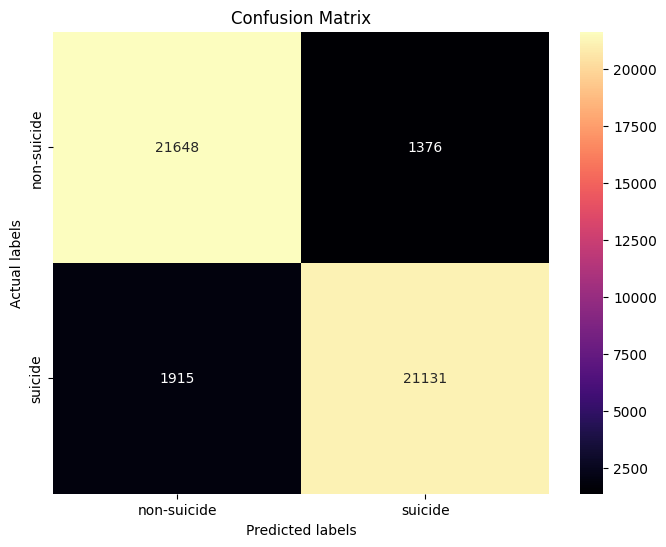

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
labels = sorted(df_cln['class'].unique())
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()


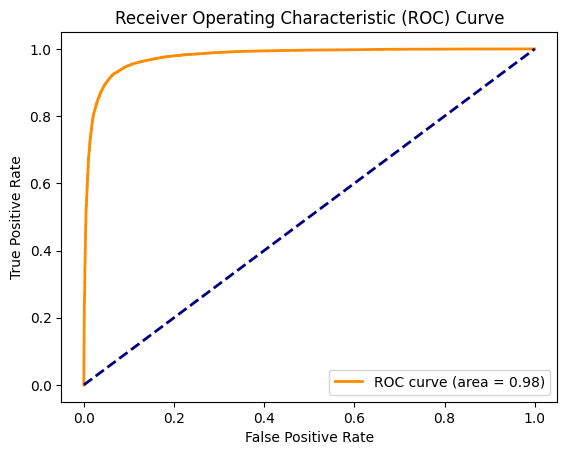

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Reformat y test and pred to numeric
y_test_num = np.where(y_test == 'suicide', 1, 0)
y_pred_num = np.where(y_pred == 'suicide', 1, 0)

# Predict probabilities for each class
y_pred_proba = classifier.predict_proba(X_test)

# Extract probabilities for the positive class
y_pred_proba_positive = y_pred_proba[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test_num, y_pred_proba_positive)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_proba_positive)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()